Proba, P(Burglar)
+------------+-----+
| Burglar(0) | 0.8 |
+------------+-----+
| Burglar(1) | 0.2 |
+------------+-----+
 P(Earthquake)
+---------------+-----+
| Earthquake(0) | 0.7 |
+---------------+-----+
| Earthquake(1) | 0.3 |
+---------------+-----+
P(Alarm| Burglar,Earthquake)
+------------+---------------+---------------+---------------+---------------+
| Burglar    | Burglar(0)    | Burglar(0)    | Burglar(1)    | Burglar(1)    |
+------------+---------------+---------------+---------------+---------------+
| Earthquake | Earthquake(0) | Earthquake(1) | Earthquake(0) | Earthquake(1) |
+------------+---------------+---------------+---------------+---------------+
| Alarm(0)   | 0.95          | 0.2           | 0.1           | 0.05          |
+------------+---------------+---------------+---------------+---------------+
| Alarm(1)   | 0.05          | 0.8           | 0.9           | 0.95          |
+------------+---------------+---------------+---------------+---------------+
P(

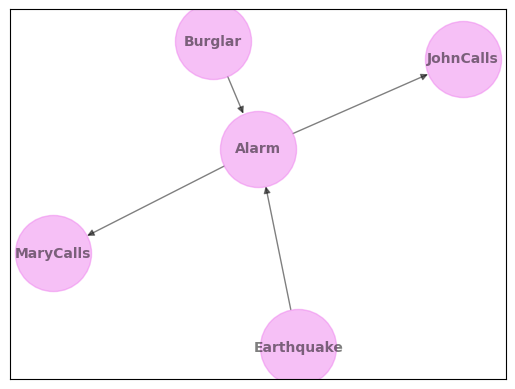

In [2]:
import pgmpy.models
import pgmpy.inference

import networkx as nx
import pylab as plt
# Create a Bayesian network
model = pgmpy.models.BayesianModel([
('Burglar', 'Alarm'),
('Earthquake', 'Alarm'),
('Alarm', 'JohnCalls'),
('Alarm', 'MaryCalls')
])
G = nx.DiGraph()
edges = [
('Burglar', 'Alarm'),
('Earthquake', 'Alarm'),
('Alarm', 'JohnCalls'),
('Alarm', 'MaryCalls')
]
G.add_edges_from(edges)
pos = nx.spring_layout(model,seed=9)
nx.draw_networkx(G,
with_labels=True,node_size=3000,node_color="violet",alpha=0.5,font_size=10,arrowsize=10,font_weight="bold")
# Define Conditional Probability Distributions (CPDs)
cpd_b =pgmpy.factors.discrete.TabularCPD(variable='Burglar',variable_card=2,values=[[0.8], [0.2]])
cpd_e =pgmpy.factors.discrete.TabularCPD(variable='Earthquake',variable_card=2,values=[[0.7], [0.3]])
cpd_a = pgmpy.factors.discrete.TabularCPD(variable='Alarm', variable_card=2,values=[[0.95, 0.2, 0.1, 0.05],[0.05, 0.8, 0.9, 0.95]],evidence=['Burglar','Earthquake'],evidence_card=[2, 2])
cpd_jc =pgmpy.factors.discrete.TabularCPD(variable='JohnCalls',variable_card=2,values=[[0.99, 0.1], [0.01, 0.9]],evidence=['Alarm'],evidence_card=[2])
cpd_mc =pgmpy.factors.discrete.TabularCPD(variable='MaryCalls',variable_card=2,values=[[0.9, 0.2], [0.1, 0.8]],evidence=['Alarm'],evidence_card=[2])
# Add CPDs to the model
model.add_cpds(cpd_b, cpd_e, cpd_a, cpd_jc, cpd_mc)
# Check the model for consistency
model.check_model()
# Print Probability distributions
print('Proba, P(Burglar)')
print(cpd_b)
print(' P(Earthquake)')

print(cpd_e)
print('P(Alarm| Burglar,Earthquake)')
print(cpd_a)
print('P(JohnCalls|Alarm)')
print(cpd_jc)
print('P(MaryCalls|Alarm)')
print(cpd_mc)
#true
c=cpd_jc.values[1,1]*cpd_mc.values[1,1]*cpd_a.values[1,1,1]
d=cpd_jc.values[1,0]*cpd_mc.values[1,0]*cpd_a.values[0,1,1]
e=c+d
f=cpd_jc.values[1,1]*cpd_mc.values[1,1]*cpd_a.values[1,1,0]
g=cpd_jc.values[1,0]*cpd_mc.values[1,0]*cpd_a.values[0,1,0]
h=f+g
i=e*cpd_e.values[1]+h*cpd_e.values[0]
j=i*cpd_b.values[1]
print("P(B|JC,MC)",j)
#false
c1=cpd_jc.values[1,1]*cpd_mc.values[1,1]*cpd_a.values[1,0,1]
d1=cpd_jc.values[1,0]*cpd_mc.values[1,0]*cpd_a.values[0,0,1]
e1=c1+d1
f1=cpd_jc.values[1,1]*cpd_mc.values[1,1]*cpd_a.values[1,0,0]
g1=cpd_jc.values[1,0]*cpd_mc.values[1,0]*cpd_a.values[0,0,0]
h1=f1+g1
i1=e1*cpd_e.values[1]+h1*cpd_e.values[0]
j1=i1*cpd_b.values[0]
print("P(No B|JC,MC)",j1)
print(f"Normalised :<{j/(j+j1)},{j1/(j+j1)}>")